The Wine Dataset consists of 5 columns; name of the wine, region where the wine is produced, variety of the wine, rating of the wine and a short note about the wine. The dataset has a total of 32980 entries.

Now, we are going to see whatever insights we can get from the dataset and determine how the regions relate to the varieties of wine, the number of wines produced in each region and many more conclusions we can draw from the data. We will also be using the Matplotlib and Seaborn libraries to visualize our data.

In [210]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

After loading up our dataset, we drop the 'notes' column since it does not add much value to our dataset. We then observe the shape of our dataset; 32980 rows and 4 columns.

We check for any null values in the dataset. 359 varieties and 3 regions were null entries. We drop all null rows from the dataset since 'variety' and 'region' are not quantitative data, meaning we can't fill the null entries with the mean, the median or ny other reasonable value.

We observe the shape again and this time we have 32620 rows and 4 columns, indicating we have dropped all null entries.

In [211]:
#read in the csv file as a Dataframe
data = pd.read_csv('wine-raitngs.csv')
data = data.drop('notes', axis =1)    #drop the notes column

In [212]:
data.shape    #check the dimension of the data



(32980, 4)

In [213]:
data.isna().sum()    #check for missing values

,0
name,0
region,3
variety,359
rating,0


In [214]:
data.dropna(axis=0, inplace=True)    #drop the missing values
data.shape    #check the dimension of the data after dropping missing values

(32620, 4)

In [215]:
data.isna().sum()    #confirmation there are no missing values

,0
name,0
region,0
variety,0
rating,0


Now, we notice that in the 'region' column, some entries are just the country name while some other entries are particular states or regions in the country, for instance, Barcelona, Spain, while . But we want to use only the countries so our data can be uniform for visualization.

We split the entries by the comma sign into a list and take the last item in the list, and strip it to remove whitespace. We append this new word for every row to a new list containing just the country name.

We then create a new column in the dataframe and name it 'new_region'. We check the unique values of entries in the 'new_region' column. We replace every instance of states in USA with 'USA'. So now all the regions are countries only.

In [216]:
#seperate regions with commas and take the last one e.g Barcelona, Spain; take Spain
new_words = []
for entry in data.region:
  row = 0
  wrdlst = entry.split(sep=',')
  word = wrdlst[-1].strip()
  new_words.append(word)

In [217]:
#create a new column in the Dataframe
data['new_region'] = new_words
data['new_region'].unique()    #check the unique values in the new column

array(['California', 'Spain', 'Washington', 'Chile', 'Australia',
       'New Zealand', 'Germany', 'Italy', 'France', 'Portugal', 'Oregon',
       'Argentina', 'Greece', 'South Africa', 'Austria', 'Other U.S.',
       'China', 'Israel', 'Uruguay', 'England', 'Mexico', 'Lebanon',
       'Hungary', 'Switzerland', 'Canada', 'Slovenia', 'Turkey'],
      dtype=object)

In [218]:
#notice some of the regions are states in USA, replace them with 'USA', to have countries all through
data['new_region'] = data['new_region'].replace(['California', 'Washington', 'Oregon', 'Other U.S.'], ['U.S.A', 'U.S.A', 'U.S.A', 'U.S.A'])

In [219]:
data['new_region'].unique()    #all states have now been replaced with USA

array(['U.S.A', 'Spain', 'Chile', 'Australia', 'New Zealand', 'Germany',
       'Italy', 'France', 'Portugal', 'Argentina', 'Greece',
       'South Africa', 'Austria', 'China', 'Israel', 'Uruguay', 'England',
       'Mexico', 'Lebanon', 'Hungary', 'Switzerland', 'Canada',
       'Slovenia', 'Turkey'], dtype=object)

We then go ahead to group the dataframe, 'data' by 'new_region' on the column 'variety' and we count each variety for each region. This gives us the total amount of wine produced in each region during the period this dataset covers.

We create a barplot of the Groupby Series below with Regions on the x-axis and Wine Count on the y-axis.

From the barplot below as well as the table below, we can see some observations.

Note: Observations are only relative to the timeframe or number of entries this dataset covers

USA, France, Italy and Spain are the biggest producers of wine.
They produce more than half the amount of wine in this dataset.

We can deduce that this four countries are the largest producers of wine .

USA produced the most amount of wine.

China, Slovenia, Switzerland produced the least amount of wine

In [220]:
newreg_group = data.sort_values(['new_region']).groupby(['new_region'])['variety'].count()    #group the data by region
newreg_group.head(28)

,variety
new_region,
Argentina,1027
Australia,1663
Austria,108
Canada,12
Chile,712
China,1
England,14
France,7917
Germany,324


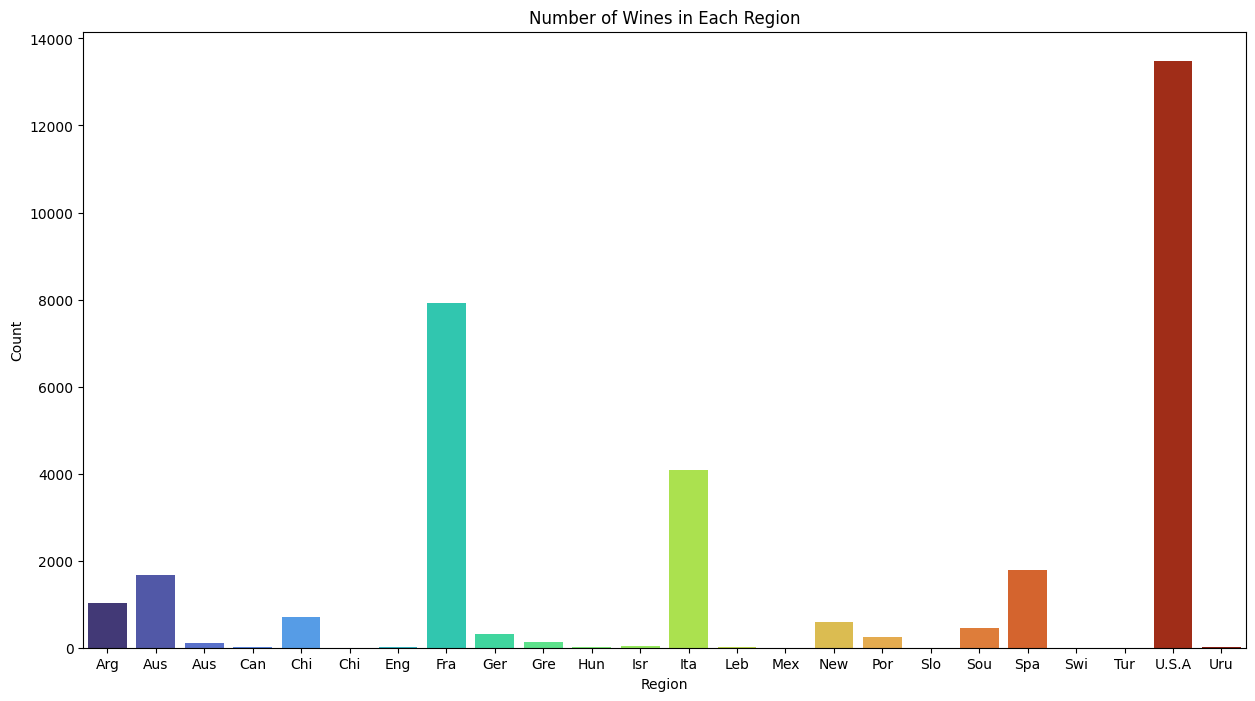

In [221]:
#create a barplot of the regions and number of wines in each region
labls = []
for reg in newreg_group.index:    #code to take the first three letters of each region except USA
  if reg == 'U.S.A':
    labls.append(reg)
  else:
    labls.append(reg[:3])
plt.figure(figsize=(15,8))
sns.barplot(x = newreg_group.index, y = newreg_group.values, hue = newreg_group.index, palette= 'turbo')
plt.xticks(ticks = range(len(newreg_group.index)), labels = labls)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Wines in Each Region')
plt.show()

Also, we go ahead to group the data by 'variety'.

Red wine, White wine, Sparkling & Champagne and Pink and Rose are the most produced variety of wine.

Red Wine is the most produced variety of wine.

Screw Cap is the least produced variety of wine.

In [222]:
var_group = data.sort_values(['variety']).groupby(['variety'])['new_region'].count()    #group the data by variety
var_group.head(28)

,new_region
variety,
Boutique,26
Collectible,220
Green Wine,27
Pink and Rosé,496
Red Wine,23490
Screw Cap,12
Sparkling & Champagne,855
White Wine,7494


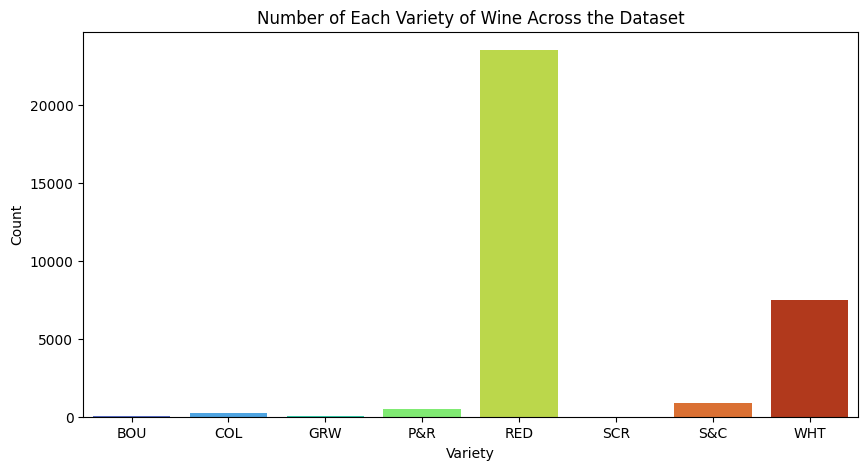

In [223]:
#create a barplot of each variety and their total count
plt.figure(figsize=(10,5))
sns.barplot(x = var_group.index, y = var_group.values, hue = var_group.index, palette= 'turbo')
plt.xticks(ticks = range(len(var_group.index)), labels = ['BOU', 'COL', 'GRW', 'P&R', 'RED', 'SCR', 'S&C', 'WHT'])
plt.xlabel('Variety')
plt.ylabel('Count')
plt.title('Number of Each Variety of Wine Across the Dataset')
plt.show()

We then take a subset of the dataframe, that corresponds only to a particular region from the 'new_region' column.
We group it variety and take a count of each variety for that particular region.

In [224]:
#create a function that creates a Dataframe with only a particular region
#groupby variety, and add any variety not included in that region with a count of 0
#returns a Dataframe

def reg_group(reg):
  usa = data[data['new_region'] == reg]
  usa_group = usa.sort_values(['variety']).groupby(['variety'])['rating'].count()

  varlst = list(data.variety.unique())    #list of all varieties
  usa_dict = usa_group.to_dict()          #convert to dictionary

  for var in varlst:
    if var not in usa_group.index:
      usa_dict[var] = usa_dict.get(var, 0)
  usa_group = pd.DataFrame.from_dict(usa_dict, orient='index', columns=['Count'])   #convert to Dataframe with a column 'Count'
  usa_group = usa_group.sort_index()    #sort by index(varieties)

  return usa_group

The table and visualization below provides a breakdown of the varieties produced in region France.

Red wine and White wine are the most produced varieties.

Red Wine is the most produced variety.

Screw cap and Boutique are the least produced varieties.

In [225]:
#call the function on region 'France'
fra_group = reg_group('France')
fra_group

,Count
Boutique,1
Collectible,100
Green Wine,11
Pink and Rosé,282
Red Wine,5506
Screw Cap,0
Sparkling & Champagne,478
White Wine,1539


In [226]:
newreg = newreg_group.to_dict()     #convert to dictionary
newreg

{'Argentina': 1027,
 'Australia': 1663,
 'Austria': 108,
 'Canada': 12,
 'Chile': 712,
 'China': 1,
 'England': 14,
 'France': 7917,
 'Germany': 324,
 'Greece': 125,
 'Hungary': 7,
 'Israel': 30,
 'Italy': 4091,
 'Lebanon': 8,
 'Mexico': 2,
 'New Zealand': 585,
 'Portugal': 251,
 'Slovenia': 1,
 'South Africa': 456,
 'Spain': 1789,
 'Switzerland': 1,
 'Turkey': 2,
 'U.S.A': 13480,
 'Uruguay': 14}

In [227]:
#function to get the key(region) if the argument passed matches the value(count)
def get_key(val):

    for key, value in newreg.items():
        if val == value:
            return key

    return "key doesn't exist"

In [228]:
#function to plot a barplot using the Dataframe returned from the reg_group function
def plot_reg_groug(reggroup):
  plt.figure(figsize=(10,5))
  sns.barplot(x=reggroup.index, y=reggroup['Count'], data = reggroup,  hue = reggroup.index)
  plt.xticks(ticks = range(len(reggroup.index)),labels=['BOU', 'COL', 'GRW', 'P&R', 'RED', 'SCR', 'S & C', 'WHT'])
  plt.xlabel('Variety')
  plt.ylabel('Count')
  plt.title(f'A Distribution of Varieties of Wine in {get_key(reggroup.values.sum())}')
  plt.show()

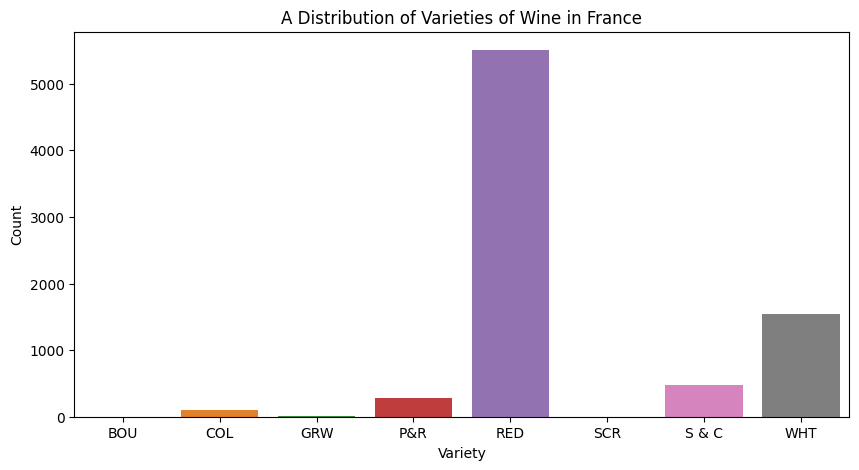

In [229]:
plot_reg_groug(reg_group('France'))     #barplot of varieties of wine in France

Just like we did above, we take a subset of the dataframe, that corresponds to only a particular variety in the 'variety' column.
We group the data by 'new_region' and take a count of the wine produced by each region for that particular variety.

In [230]:
varlist = sorted(list(data.variety.unique()))     #create a list of varieties
varlist

['Boutique',
 'Collectible',
 'Green Wine',
 'Pink and Rosé',
 'Red Wine',
 'Screw Cap',
 'Sparkling & Champagne',
 'White Wine']

In [231]:
#create a function that creates a Dataframe with only a particular variety
#groupby 'new_region', and add any region not included in that variety with a count of 0
#returns a Dataframe

def var_reg(reg):
  varlist = sorted(list(data.variety.unique()))     #list of varieties

  usa = data[data['variety'] == varlist[reg]]
  usa_group = usa.groupby('new_region')['rating'].count()

  reglst = list(data.new_region.unique())     #list of regions
  usa_dict = usa_group.to_dict()              #convert to dictionary

  for region in reglst:
    if region not in usa_group.index:
      usa_dict[region] = usa_dict.get(region, 0)
  usa_group = pd.DataFrame.from_dict(usa_dict, orient='index', columns=['Region'])    #Convert to Dataframe
  usa_group = usa_group.sort_index()    #sort by index(regions)

  return usa_group

The table and visualization below provides a breakdown of regions that produced the most and least amount of Red wine.

USA, France, Italy and Spain produced the most amount of Red Wine, with USA producing the most.

Switzerland, China and Canada were the least producing regions of Red wine.

In [232]:
#call the function on variety 'Red wine'
red_reg = var_reg(4)
red_reg

,Region
Argentina,910
Australia,1309
Austria,4
Canada,1
Chile,562
China,1
England,0
France,5506
Germany,3
Greece,34


In [233]:
var = var_group.to_dict()    #convert to dictionary
var

{'Boutique': 26,
 'Collectible': 220,
 'Green Wine': 27,
 'Pink and Rosé': 496,
 'Red Wine': 23490,
 'Screw Cap': 12,
 'Sparkling & Champagne': 855,
 'White Wine': 7494}

In [234]:
#function to get the key(variety) if the argument passed matches the value(count)
def get_var_key(val):

    for key, value in var.items():
        if val == value:
            return key

    return "key doesn't exist"

In [235]:
#function to plot a barplot using the Dataframe returned from the var_reg function
def plot_var_reg(reggroup):
  plt.figure(figsize=(10,5))
  sns.barplot(x=reggroup['Region'], y=reggroup.index, data = reggroup, orient='h', hue = reggroup.index)
  plt.xlabel('Count')
  plt.ylabel('Region')
  plt.title(f'A Distribution of {get_var_key(reggroup.values.sum())} Across Various Regions')
  plt.show()

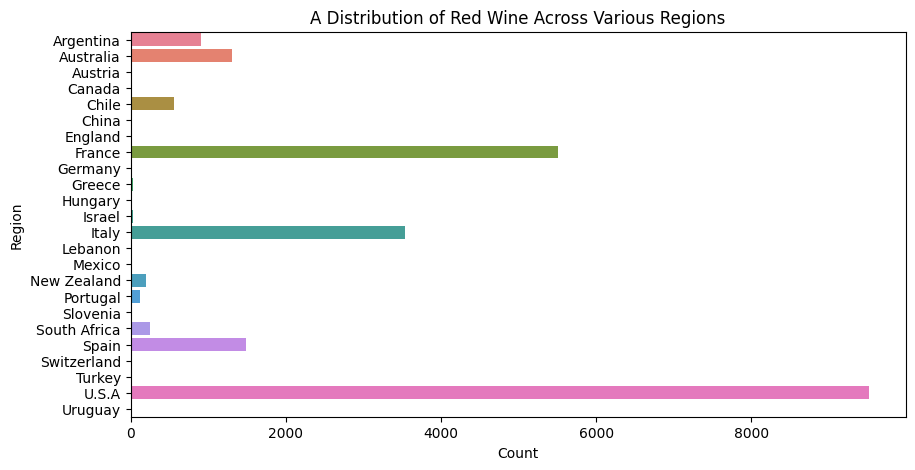

In [236]:
plot_var_reg(var_reg(4))    #barplot of regions in which Red wines are produced

We further go on to check the average ratings of all wines produced in each of the regions the dataset covers.

Regions with less than 10 wines produced were removed, like China who only produced 1.

Although the average ratings across all regions are not too far apart;     
England, Italy, Germany, France, USA and Portugal produced the best quality wines.


In [237]:
#group by 'new_region' and take counts of variety and mean of rating
reg_rat = data.groupby(['new_region'])[['variety', 'rating']].agg({'variety': 'count','rating': ['mean']})
reg_ratings = reg_rat[reg_rat['variety']['count']>=10]
reg_ratings

,variety,rating
,count,mean
new_region,,
Argentina,1027,90.534567
Australia,1663,90.891762
Austria,108,91.694444
Canada,12,91.083333
Chile,712,90.015449
England,14,92.500000
France,7917,91.795124
Germany,324,91.231481


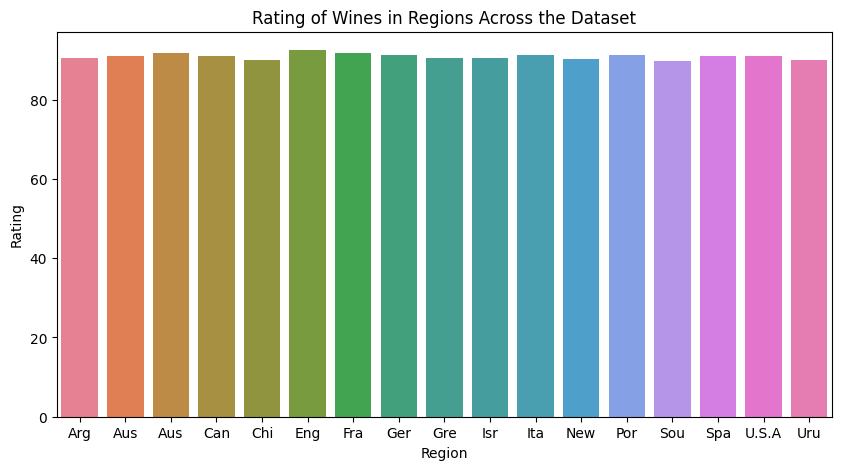

In [238]:
#create a barplot of each region and their average rating
labls = []
regions = ['China', 'Hungary', 'Lebanon', 'Mexico', 'Slovenia', 'Switzerland', 'Turkey']
for reg in newreg_group.index:    #code to take the first three letters of each region except USA
  if reg == 'U.S.A':
    labls.append(reg)
  elif reg in regions:
    continue
  else:
    labls.append(reg[:3])
plt.figure(figsize=(10,5))
sns.barplot(x = reg_ratings.index, y = reg_ratings['rating']['mean'], hue = reg_ratings.index)
plt.xticks(ticks = range(len(newreg_group.index)- 7), labels = labls)
plt.xlabel('Region')
plt.ylabel('Rating')
plt.title('Rating of Wines in Regions Across the Dataset')
plt.show()

We also check the average ratings of all wines produced in each of the varieties the dataset covers.

Although the average ratings across the varieties are not too far apart;     
Collectible, Boutique and Red wines were the wines produced with the best quality.


In [239]:
#group by 'variety' and take counts of region and mean of rating
var_ratings = data.groupby(['variety'])[['new_region', 'rating']].agg({'new_region': 'count','rating': ['mean']})
var_ratings

,new_region,rating
,count,mean
variety,,
Boutique,26,92.153846
Collectible,220,93.654545
Green Wine,27,91.333333
Pink and Rosé,496,90.179435
Red Wine,23490,91.396126
Screw Cap,12,91.166667
Sparkling & Champagne,855,91.352047
White Wine,7494,90.472244


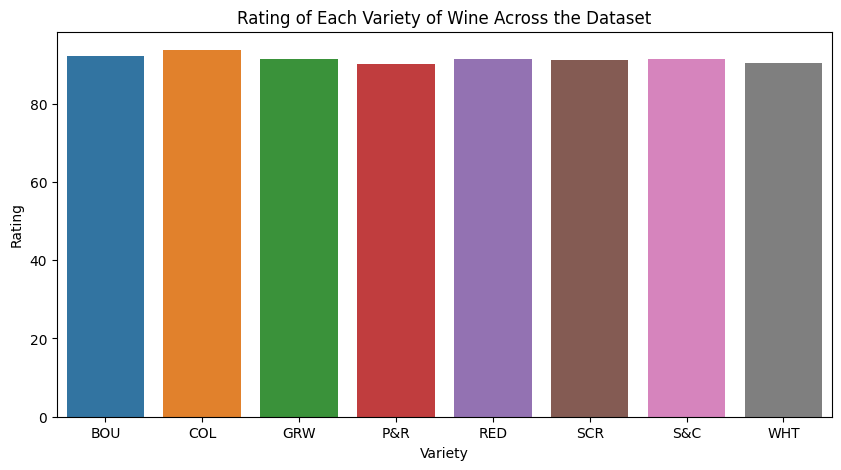

In [240]:
#create a barplot of each variety and their average rating
plt.figure(figsize=(10,5))
sns.barplot(x = var_ratings.index, y = var_ratings['rating']['mean'], hue = var_ratings.index)
plt.xticks(ticks = range(len(var_group.index)), labels = ['BOU', 'COL', 'GRW', 'P&R', 'RED', 'SCR', 'S&C', 'WHT'])
plt.xlabel('Variety')
plt.ylabel('Rating')
plt.title('Rating of Each Variety of Wine Across the Dataset')
plt.show()

We breakdown the average ratings further for specific regions. We group by 'variety' so as to find the average rating for each variety of wine produced in that region.

In [241]:
#create a function that creates a Dataframe with only a particular region
#groupby variety, and add any variety not included in that region with a rating of 0
#returns a Dataframe

def region_rating(region):
  reg = data[data['new_region'] == region]
  reg_rat = reg.sort_values(['variety']).groupby(['variety'])['rating'].mean()

  varlst = list(data.variety.unique())    #list of all varieties
  regrat_dict = reg_rat.to_dict()          #convert to dictionary

  for var in varlst:
    if var not in reg_rat.index:
      regrat_dict[var] = regrat_dict.get(var, 0)
  reg_rat = pd.DataFrame.from_dict(regrat_dict, orient='index', columns=['Mean_rating'])   #convert to Dataframe with a column 'Mean_rating'
  reg_rat = reg_rat.sort_index()

  return reg_rat

The table and visualization below provides a breakdown of the ratings of varieties of wine produced by Italy.

The Boutique wine has the most quality

There was no entry of Screw cap wine for Italy

In [242]:
region_rating('Italy')

,Mean_rating
Boutique,95.000000
Collectible,93.500000
Green Wine,92.400000
Pink and Rosé,89.733333
Red Wine,91.360452
Screw Cap,0.000000
Sparkling & Champagne,90.876712
White Wine,90.000000


In [243]:
#function to plot a barplot using the Dataframe returned from the region_rating function
def plot_reg_rating(regrating):
  plt.figure(figsize=(10,5))
  sns.barplot(x=regrating.index, y=regrating['Mean_rating'], data = regrating,  hue = regrating.index)
  plt.xticks(ticks = range(len(regrating.index)),labels=['BOU', 'COL', 'GRW', 'P&R', 'RED', 'SCR', 'S & C', 'WHT'])
  plt.xlabel('Variety')
  plt.ylabel('Mean Rating')
  plt.show()

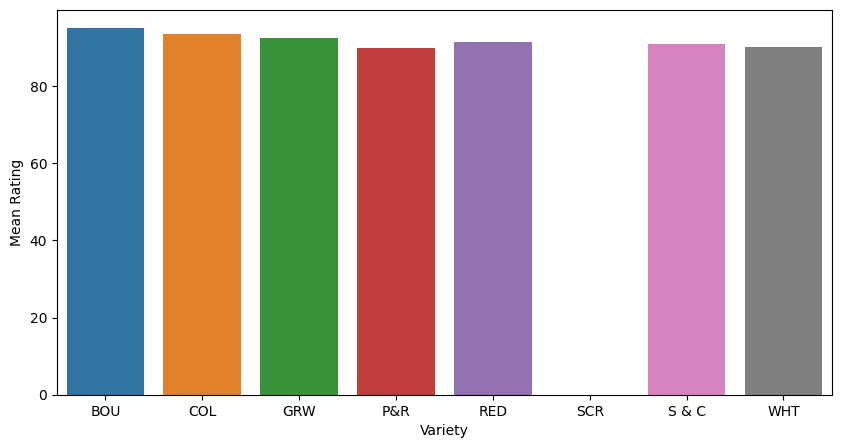

In [244]:
plot_reg_rating(region_rating('Italy'))

Similarly, we breakdown the average ratings further for specific varieties. We group by 'new_region' so as to find the average rating for each region that produced wine of that particular variety.

In [245]:
#create a function that creates a Dataframe with only a particular variety
#groupby 'new_region', and add any region not included in that variety with a rating of 0
#returns a Dataframe
def variety_rating(variety):
  varlist = sorted(list(data.variety.unique()))

  var = data[data['variety'] == varlist[variety]]
  var_rat = var.sort_values(['new_region']).groupby(['new_region'])['rating'].mean()

  reglst = list(data.new_region.unique())    #list of all varieties
  varrat_dict = var_rat.to_dict()          #convert to dictionary

  for reg in reglst:
    if reg not in var_rat.index:
      varrat_dict[reg] = varrat_dict.get(reg, 0)
  var_rat = pd.DataFrame.from_dict(varrat_dict, orient='index', columns=['Mean_rating'])   #convert to Dataframe with a column 'Mean_rating'
  var_rat = var_rat.sort_index()

  return var_rat

The table and visualization below provides a breakdown of the ratings of each region that produced Red wine.

Switzerland, China, USA, Italy, France, Spain produced best quality Red wine.

There was no entry of Red wine for England, Hungary and Slovenia.

In [246]:
variety_rating(4)

,Mean_rating
Argentina,90.563736
Australia,91.117647
Austria,89.500000
Canada,89.000000
Chile,90.153025
China,93.000000
England,0.000000
France,91.968216
Germany,90.333333
Greece,90.382353


In [247]:
#function to plot a barplot using the Dataframe returned from the variety_rating function
def plot_variety_rating(varrating):
  plt.figure(figsize=(10,5))
  sns.barplot(y=varrating.index, x=varrating['Mean_rating'], orient = 'h', data = varrating,  hue = varrating.index)
  plt.ylabel('Region')
  plt.xlabel('Mean Rating')
  plt.show()

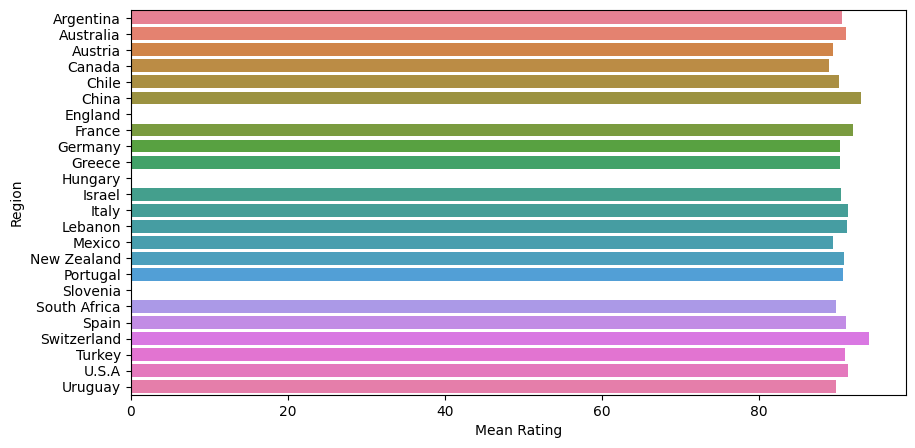

In [248]:
plot_variety_rating(variety_rating(4))